# Combining all data

In this notebook I will do the same as in the pyrfume-data notebook, but for all the data. This means combing all the data and its labels.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

## Load in all datasets

And match the molecules with SMILES to their labels.

In [37]:
#Arctander data
arctander_mols = pd.read_csv('Pyrfume_data/arctander_1960/molecules.csv')[['CID', 'IsomericSMILES']]
arctander_stim = pd.read_csv('Pyrfume_data/arctander_1960/stimuli.csv')
arctander_behav = pd.read_csv('Pyrfume_data/arctander_1960/behavior_1_sparse.csv')

arctander_labels = pd.merge(arctander_stim, arctander_behav, on='Stimulus')
arctander_labels.rename(columns={'new_CID': 'CID'}, inplace=True)
arctander_mols.rename(columns={'new_CID': 'CID'}, inplace=True)
arctander = pd.merge(arctander_mols, arctander_labels, on='CID')
arctander.drop(['ChemicalName', 'CAS'], axis=1, inplace=True)
arctander.rename(columns={'Labels': 'Descriptors'}, inplace=True)
print(arctander.shape)
print(arctander.columns)

#AromaDB data
aromaDB_mols = pd.read_csv('Pyrfume_data/aromadb/molecules.csv')[['CID', 'IsomericSMILES']]
aromaDB_stim = pd.read_csv('Pyrfume_data/aromadb/stimuli.csv')
aromaDB_behav = pd.read_csv('Pyrfume_data/aromadb/behavior.csv')

aromaDB_labels = pd.merge(aromaDB_stim, aromaDB_behav, on='Stimulus')
aromaDB = pd.merge(aromaDB_mols, aromaDB_labels, on='CID')
aromaDB.drop(['Raw Descriptors', 'Modifiers'], axis=1, inplace=True)
aromaDB.rename(columns={'Filtered Descriptors': 'Descriptors'}, inplace=True)
print(aromaDB.shape)
print(aromaDB.columns)

#FlavorDB data
flavordb_mols = pd.read_csv('Pyrfume_data/flavordb/molecules.csv')[['CID', 'IsomericSMILES']]
flavordb_stim = pd.read_csv('Pyrfume_data/flavordb/stimuli.csv')
flavordb_behav = pd.read_csv('Pyrfume_data/flavordb/behavior.csv')

flavordb_labels = pd.merge(flavordb_stim, flavordb_behav, on='Stimulus')
flavordb = pd.merge(flavordb_mols, flavordb_labels, on='CID')

#Removing entries with no descriptors
print(flavordb.shape)
flavordb = flavordb.dropna(axis=0, subset=['Odor Percepts'])

flavordb.drop(['Odor Modifiers', 'Flavor Percepts', 'Flavor Modifiers'], axis=1, inplace=True)
flavordb.rename(columns={'Odor Percepts': 'Descriptors'}, inplace=True)
print(flavordb.shape)
print(flavordb.columns)

#Flavornet data
flavornet_mols = pd.read_csv('Pyrfume_data/flavornet/molecules.csv')[['CID', 'IsomericSMILES']]
flavornet_stim = pd.read_csv('Pyrfume_data/flavornet/stimuli.csv')
flavornet_behav = pd.read_csv('Pyrfume_data/flavornet/behavior.csv')

flavornet_labels = pd.merge(flavornet_stim, flavornet_behav, on='Stimulus')
flavornet = pd.merge(flavornet_mols, flavornet_labels, on='CID')
print(flavornet.shape)
print(flavornet.columns)

#Goodscents data
goodscents_mols = pd.read_csv('Pyrfume_data/goodscents/molecules.csv')[['CID', 'IsomericSMILES']]
goodscents_stim = pd.read_csv('Pyrfume_data/goodscents/stimuli.csv')
goodscents_behav = pd.read_csv('Pyrfume_data/goodscents/behavior.csv')

goodscents_labels = pd.merge(goodscents_stim, goodscents_behav, on='Stimulus')
goodscents = pd.merge(goodscents_mols, goodscents_labels, on='CID')
goodscents.drop(['TGSC ID', 'Concentration %','Solvent'], axis=1, inplace=True)
print(goodscents.shape)
print(goodscents.columns)

#IFRA data
ifra_mols = pd.read_csv('Pyrfume_data/ifra_2019/molecules.csv')[['CID', 'IsomericSMILES']]
ifra_stim = pd.read_csv('Pyrfume_data/ifra_2019/stimuli.csv')
ifra_behav = pd.read_csv('Pyrfume_data/ifra_2019/behavior.csv')
ifra_behav['Descriptor 1'] = ifra_behav['Descriptor 1'] + ';' + ifra_behav['Descriptor 2'] + ';' + ifra_behav['Descriptor 3']

ifra_labels = pd.merge(ifra_stim, ifra_behav, on='Stimulus')
ifra = pd.merge(ifra_mols, ifra_labels, on='CID')
ifra.drop(['Descriptor 2', 'Descriptor 3'], axis=1, inplace=True)
ifra.rename(columns={'Descriptor 1': 'Descriptors'}, inplace=True)
print(ifra.shape)
print(ifra.columns)

#Leffingwell data
leffingwell_mols = pd.read_csv('Pyrfume_data/leffingwell/molecules.csv')[['CID', 'IsomericSMILES']]

#Drop all rows with negative CID
leffingwell_mols = leffingwell_mols[leffingwell_mols['CID'] > 0]
leffingwell_stim = pd.read_csv('Pyrfume_data/leffingwell/stimuli.csv')
leffingwell_behav = pd.read_csv('Pyrfume_data/leffingwell/behavior_sparse.csv')

leffingwell_labels = pd.merge(leffingwell_stim, leffingwell_behav, on='Stimulus')
leffingwell = pd.merge(leffingwell_mols, leffingwell_labels, on='CID')
leffingwell.drop(['MolecularWeight', 'IsomericSMILES_x', 'IUPACName', 'name', 'cas', 'IsomericSMILES_y','Raw Labels'], axis=1, inplace=True)
leffingwell.rename(columns={'Labels': 'Descriptors'}, inplace=True)
print(leffingwell.shape)
print(leffingwell.columns)

(2824, 4)
Index(['CID', 'IsomericSMILES', 'Stimulus', 'Descriptors'], dtype='object')
(869, 4)
Index(['CID', 'IsomericSMILES', 'Stimulus', 'Descriptors'], dtype='object')
(25595, 7)
(525, 4)
Index(['CID', 'IsomericSMILES', 'Stimulus', 'Descriptors'], dtype='object')
(716, 4)
Index(['CID', 'IsomericSMILES', 'Stimulus', 'Descriptors'], dtype='object')
(4626, 4)
Index(['CID', 'IsomericSMILES', 'Stimulus', 'Descriptors'], dtype='object')
(1146, 4)
Index(['CID', 'IsomericSMILES', 'Stimulus', 'Descriptors'], dtype='object')
(3487, 4)
Index(['CID', 'IsomericSMILES', 'Stimulus', 'Descriptors'], dtype='object')


Turn arctander and leffingwell labels into ';'-separated strings, because they are stored as python list in a string.

In [38]:
def list_to_sep(des_list):
    try:
        actual_list = literal_eval(des_list)
    except:
        actual_list = []
    
    if bool(actual_list): return ';'.join(actual_list)
    else:
        return 'NaN'

arctander['Descriptors'] = arctander['Descriptors'].apply(lambda x: list_to_sep(x))
leffingwell['Descriptors'] = leffingwell['Descriptors'].apply(lambda x: list_to_sep(x))

#combined_labels.to_csv('combined_labels.csv', index=False)
print(arctander.head)
print(leffingwell.head)

<bound method NDFrame.head of             CID                         IsomericSMILES  Stimulus  \
0           107                  C1=CC=C(C=C1)CCC(=O)O      2579   
1           126                      C1=CC(=CC=C1C=O)O      1726   
2           174                                 C(CO)O      1215   
3           176                                CC(=O)O        16   
4           176                                CC(=O)O      2780   
...         ...                                    ...       ...   
2819  159703752  C1=CC=C(C=C1)CC=O.C1=CC=C2C(=C1)C=CN2      1774   
2820  160078140                    CC(C=C)C1CCCC=C1.CO       375   
2821  160829480                   CCC#CC(C)C.C(=O)(O)O      1291   
2822  163709488                        CCC1CCC(O1)(C)O      1750   
2823  163735825                  C1CCCCCOC(=O)CCOCCCC1      1758   

                  Descriptors  
0           balsamic;vanillin  
1              woody;balsamic  
2                       musty  
3                        

Now that we have the data for all sets together we merge all rows based on CID. This means that we will have a row for each molecule with all the labels for that molecule. 

In [39]:
#Append all dataframes together 
all_compounds = pd.concat([arctander, aromaDB, flavordb, flavornet, goodscents, ifra, leffingwell], axis=0, ignore_index=True)
all_compounds.drop(['Stimulus'], inplace=True, axis=1)
print(all_compounds.shape)

#Check if duplicates have same SMILES
for cid in all_compounds['CID'].unique():
    if len(all_compounds[all_compounds['CID'] == cid]['IsomericSMILES'].unique()) > 1:
        print(cid) #If there are no two SMILES for the same CID, then this will print nothing.



#Drop all NaN values in descriptors
all_compounds.dropna(subset=['Descriptors'], inplace=True)

#Some rows have an "NaN" string as value so count and drop those as well.
count = all_compounds[all_compounds['Descriptors'] == 'NaN']

all_compounds = all_compounds[all_compounds['Descriptors'] != 'NaN']
print(all_compounds.shape)


#Here all rows are merged on CID and labels are joined together.
all_compounds = all_compounds.astype({'CID': 'int64'}) #Setting the CID column to dtype int64 because it works better with other code.

all_compounds.reset_index(drop=True, inplace=True)
agg_functions = {'CID': 'first', 'IsomericSMILES': 'first', 'Descriptors': lambda x: ';'.join(x)} #Takes the first CID and SMILES and joins all the descriptors together.
all_compounds = all_compounds.groupby('CID').aggregate(agg_functions)
print(all_compounds.shape)

(14193, 3)
(13945, 3)
(7531, 3)


The data also ontains mixtures of compounds. These have their own CID and descriptors but are actually a mixture of molecules. We will remove these from the data. The SMILES encoding uses a '.' to separate the molecules in a mixture. We will remove all rows that have a '.' in the SMILES.

In [41]:
#Get SMILES with '.' in them
all_compounds['HasDot'] = all_compounds['IsomericSMILES'].apply(lambda x: '.' in x)

#Drop all rows with '.' in SMILES
all_compounds = all_compounds[all_compounds['HasDot'] == False]
all_compounds.drop(['HasDot'], axis=1, inplace=True)
print(all_compounds.shape)

(7257, 3)


We also remove duplicate descriptors after setting all descriptors to lowercase.

In [49]:
#Remove capitalization and remove duplicates
all_compounds['Descriptors'] = all_compounds['Descriptors'].str.lower()
all_compounds['Descriptors'] = all_compounds['Descriptors'].str.split(';').apply(set).apply(list).apply(lambda x: ';'.join(x))

The first thing to do now is remove synonyms and spelling mistakes. This is done manually by looking at the labels and adding them with their stemmed version to ' labels-to-be-lemmatixed.txt'. Then we replace these labels with their stemmed version througout the dataset. Finally we can remove double labels.

In [50]:
#Count how many times each descriptor appears and save to file
def count_labels(df):
    all_descriptors = []
    for des in df['Descriptors']:
        all_descriptors.extend(des.split(';'))

    unique_descriptors = list(set(all_descriptors))

    #Sort list
    unique_descriptors.sort()

    #Count labels
    label_counts = []
    for des in unique_descriptors:
        label_counts.append(all_descriptors.count(des))

    #Write list to file
    # with open('label_counts.txt', 'w') as f:
    #     for i in range(len(unique_descriptors)):
    #         f.write(unique_descriptors[i] + ' ' + str(label_counts[i]) + '\n')

    #f.close()

def print_labels(df):
    all_descriptors = []
    for des in df['Descriptors']:
        all_descriptors.extend(des.split(';'))

    unique_descriptors = list(set(all_descriptors))

    #Sort list
    unique_descriptors.sort()

    for des in unique_descriptors:
        print(des)

count_labels(all_compounds)
print_labels(all_compounds)


absinthe
absolute
acacia
acetaldehyde
acetone
acetophenone
acid
acorn
acrid
acrylate
agarwood
agreeable
alcohol
aldehidic
aldehyde
algae
alkaline
alkane
alliaceous
allspice
almond
amber
ambertte
amine
ammonia
amyl
anethole
angelica
animal
anise
apple
apple, rose
apricot
armoise
aromatic
arrack
artemisia
artichoke
asparagus
astringent
autumn
bacon
baked
balsam
balsamic
banana
barley roast barley
basil
bay
bayleaf
bean green bean
beany
beef
beef roast beef
beeswax
beet
bell pepper
benzene
benzoate
benzoin
bergamot
berry
biscuit
bitter
bittersweet
blackberry
blackcurrant
bland
bloody
blossom
blueberry
boiled
boiled vegetable
bois
bois de rose
bonbon
borneol
boronia
bouillon
box tree
brandy
bread
broccoli
brothy
brown
brown sugar
bubble gum
buchu
bud
burnt
burnt sugar
butter
butter rancid
buttermilk
butterscotch
buttery
butyric
cabbage
cacao
cakes
camomile
camphor
cananga
candy
cantaloupe
capers
caprylic
caramel
caraway
cardamom
cardboard
carnation
carrot
carrot seed
carvone
cashew
cassia

In [51]:
#Reading in the labels to be lemmatized.
f = open("labels-to-be-lemmatixed.txt", "r")

labels_to_be_lemmatized = []
for line in f: 
    labels_to_be_lemmatized.append((line.strip()))

f.close()

for label in labels_to_be_lemmatized:
    temp = label.split(',')
    all_compounds['Descriptors'] = all_compounds['Descriptors'].apply(lambda x: x.replace(temp[0], temp[1]))

Now we remove double labels, and then we can start doing statistics on the labels.

In [52]:
def make_unqiue(labels):
   return ';'.join(list(set(labels.split(';'))))

all_compounds['Descriptors'] = all_compounds['Descriptors'].apply(lambda x: x.lower())
all_compounds['Descriptors'] = all_compounds['Descriptors'].apply(lambda x: make_unqiue(x))

In [53]:
#Count total number of unique descriptors
def num_descriptors(df):
    labels = df['Descriptors'].apply(lambda x: x.split(';'))
    all_labels = []
    for label in labels:
        all_labels.extend(label)

    return len(set(all_labels))

print(num_descriptors(all_compounds))
print_labels(all_compounds)

653

absinthe
absolute
acacia
acetaldehyde
acetone
acetophenone
acid
acorn
acrid
acrylate
agarwood
agreeable
alcohol
aldehidic
aldehyde
algae
alkaline
alkane
alliaceous
allspice
almond
amber
ambertte
amine
ammonia
amyl
anethole
angelica
animal
anise
apple
apple, rose
apricot
armoise
aromatic
arrack
artemisia
artichoke
asparagus
astringent
autumn
bacon
baked
balsam
balsamic
banana
barley roast barley
basil
bay
bayleaf
bean green bean
beany
beef
beef beef
beeswax
beet
bell pepper
benzene
benzoate
benzoin
bergamot
berry
biscuit
bitter
bittersweet
blackberry
blackcurrant
bland
bloody
blossom
blueberry
boiled
boiled vegetable
bois
bois de rose
bonbon
borneol
boronia
bouillon
box tree
brandy
bread
broccoli
brothy
brown
brown sugar
bubble gum
buchu
bud
burnt
burnt sugar
butter
butter rancid
buttermilk
butterscotch
buttery
butyric
cabbage
cacao
cakes
camomile
camphor
cananga
candy
cantaloupe
capers
caprylic
caramel
caraway
cardamom
cardboard
carnation
carrot
carrot seed
carvone
cashew
cassia
c

Remove labels that occur less than 30 times.

In [54]:
#Find labels that occur less than 30 times
labels_to_remove = all_compounds['Descriptors'].str.split(';', expand=True).stack().value_counts()

#labels_to_remove[labels_to_remove < 30].to_latex("labels_to_be_removed.txt") #Output to latex table for paper.

labels_to_remove = labels_to_remove[labels_to_remove < 30]
print(labels_to_remove)

ammonia                     29
dust                        28
balsam                      28
tarry                       28
lime                        27
                            ..
red                          1
mignonette                   1
alkaline                     1
florentina                   1
methyl heptine carbonate     1
Name: count, Length: 488, dtype: int64


Remove odorless compounds.

In [55]:
all_compounds['Descriptors'] = all_compounds['Descriptors'].apply(lambda x: x.replace('odorless;', ''))
all_compounds['Descriptors'] = all_compounds['Descriptors'].apply(lambda x: x.replace(';odorless', ''))
all_compounds['Descriptors'] = all_compounds['Descriptors'].apply(lambda x: x.replace('odorless', ''))
print(all_compounds.shape)

(7257, 3)


In [56]:
#Remove labels that occur less than 30 times
all_compounds['Descriptors'] = all_compounds['Descriptors'].apply(lambda x: ';'.join([item for item in x.split(';') if item not in labels_to_remove.index]))

print_labels(all_compounds)
count_labels(all_compounds)
print(num_descriptors(all_compounds))


acid
alcohol
aldehyde
alliaceous
almond
amber
animal
anise
apple
apricot
aromatic
balsamic
banana
beef
bergamot
berry
bitter
blackcurrant
bland
brandy
bread
brothy
brown
burnt
buttery
cabbage
camphor
caramel
cedar
celery
chamomile
characteristic
cheese
chemical
cherry
chicken
chocolate
cinnamon
citrus
clean
clove
cocoa
coconut
coffee
cognac
cooked
cooling
cortex
coumarin
cream
cucumber
dairy
dry
earthy
ester
ether
fat
fermented
fish
floral
fresh
fruit
gardenia
garlic
gasoline
geranium
gourmand
grape
grapefruit
grass
green
hawthorn
hay
hazelnut
herb
honey
horseradish
hyacinth
jam
jasmine
juicy
ketonic
lactone
lavender
leaf
leather
lemon
licorice
lilac
lily
malt
marine
meat
medicine
melon
menthol
metal
mild
milk
mimosa
mint
moss
muguet
mushroom
musk
narcissus
natural
neroliii
nut
oil
onion
orange
orange-blossom
orris
ozone
patchouli
peach
pear
peel
peppery
phenol
pine
pineapple
plastic
pleasant
plum
popcorn
potato
powdery
pungent
radish
raspberry
ripe
roast
root
rose
rum
sandalwood
savo

In [57]:
#Remove compounds with zero descriptors after removing the descriptors above.
print(all_compounds.shape)
all_compounds = all_compounds[all_compounds['Descriptors'] != '']
print(all_compounds.shape)

(7257, 3)
(7036, 3)


Because some compounds in the set are way to heavy to be a realistic odorants we remove them from the dataset. The cutoff is set at 697g/mol because this is the weight of the last molecule that is in a realistic weight range. We also remove odorless compounds that are heavier than this cutoff.

In [58]:
import rdkit.Chem as Chem
from rdkit.Chem import rdMolDescriptors

#Get molecular weights of compounds.
all_compounds['MolecularWeight'] = all_compounds['IsomericSMILES'].apply(lambda x: rdMolDescriptors.CalcExactMolWt(Chem.MolFromSmiles(x)))

#Remove compounds with molecular weights above 696.
all_compounds = all_compounds[all_compounds['MolecularWeight'] <= 697]
print(all_compounds.shape)


(7028, 4)


Escpecially the odorless compounds seem to contain a lot of salts. These salts cannot be seen as odorants or be compared to odorants as nonodorants. We remove all salts from the dataset.

In [59]:
#Remove compounds containing other elements besides C, N, O, S, P.
all_compounds['HasOtherElements'] = all_compounds['IsomericSMILES'].apply(lambda x: Chem.MolFromSmiles(x).HasSubstructMatch(Chem.MolFromSmarts('[!#6;!#7;!#8;!#16;!#15]')))

all_compounds = all_compounds[all_compounds['HasOtherElements'] == False]
all_compounds.drop(['HasOtherElements'], axis=1, inplace=True)
print(all_compounds.shape)

(7001, 4)


Now we count how many labels each compound has and add that as a column.

1
20


Text(0.5, 0, 'Number of labels')

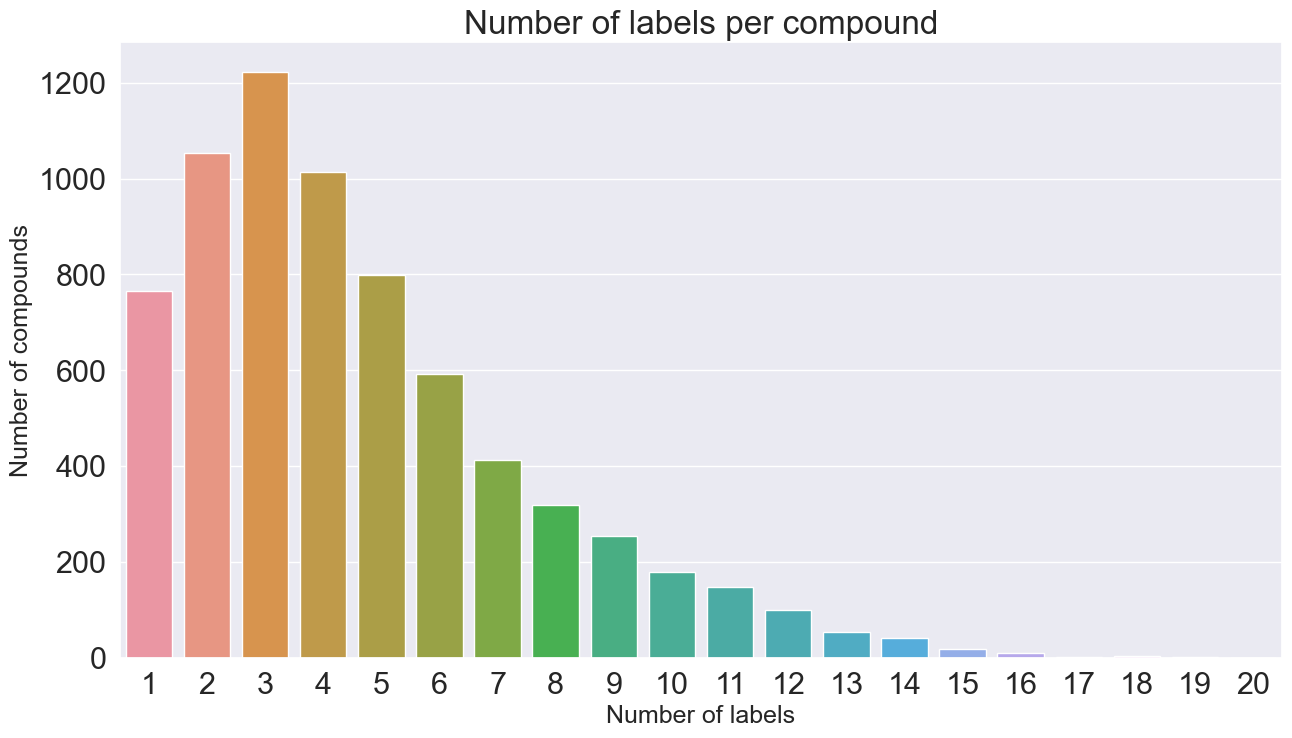

In [60]:
import seaborn as sns

#Count descriptors per compound
all_compounds['Descriptor Count'] = all_compounds['Descriptors'].apply(lambda x: len(x.split(';')))

# print min and max number of descriptors per compound
print(all_compounds['Descriptor Count'].min())
print(all_compounds['Descriptor Count'].max())

#Plot distribution of descriptors per compound
rowSums = all_compounds['Descriptor Count']
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)
plt.title("Number of labels per compound")
plt.ylabel('Number of compounds', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)#adding the text labels

We also count the amount of compounds each label has and plot the data.

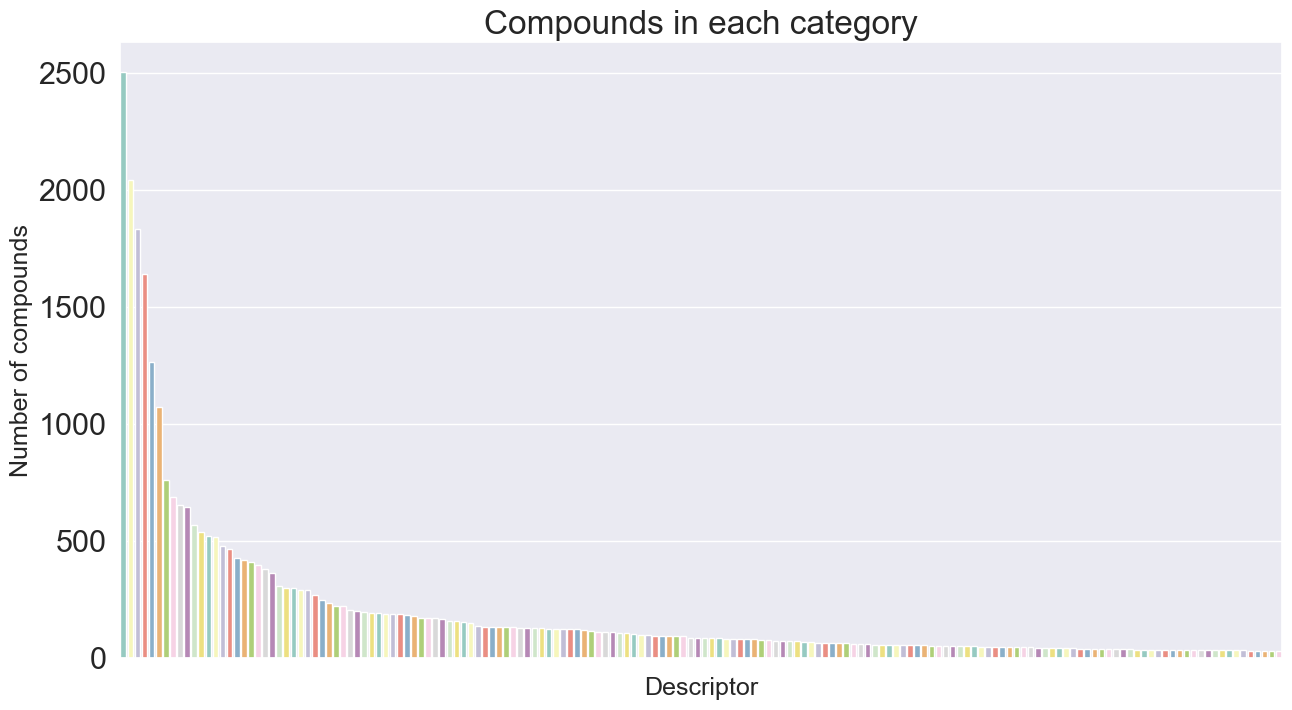

In [61]:
#Plot molecules per label
labels = all_compounds['Descriptors'].apply(lambda x: x.split(';'))
all_labels = []

for label in labels:
    all_labels.extend(label)

labels = pd.Series(all_labels)
labels = labels.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(x=labels.index, y=labels.values, palette='Set3')
plt.title("Compounds in each category", fontsize=24)
plt.ylabel('Number of compounds', fontsize=18)
plt.xlabel('Descriptor', fontsize=18)#adding the text labels
ax.set(xticklabels=[])
plt.show()

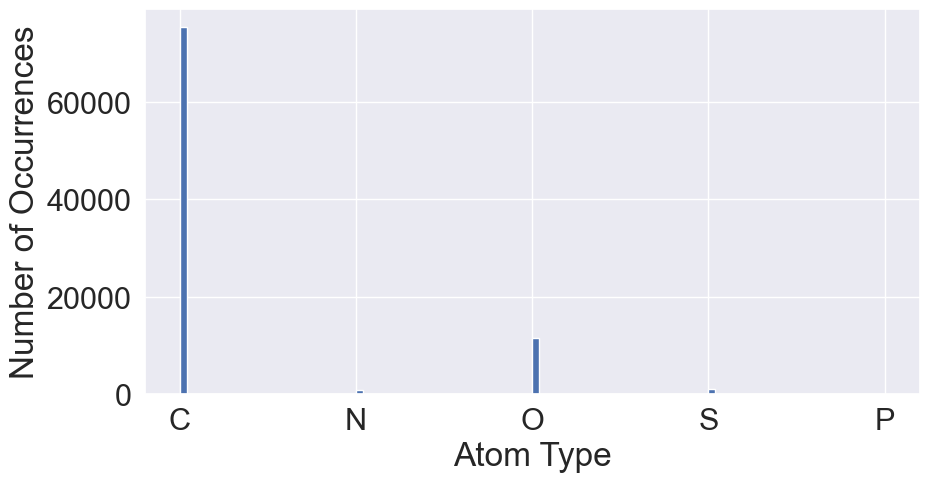

C    75220
O    11604
S     1001
N      859
P        5
Name: count, dtype: int64


In [62]:
#Find all atom types present in the dataset
import rdkit.Chem as Chem

all_atoms = []
for smiles in all_compounds['IsomericSMILES']:
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        all_atoms.append(atom.GetSymbol())

#Plot distribution of atom types
plt.figure(figsize=(10, 5))
plt.hist(all_atoms, bins=100)
plt.xlabel('Atom Type')
plt.ylabel('Number of Occurrences')
plt.show()
print(pd.Series(all_atoms).value_counts())

In [63]:
#Print top 10 most common descriptors
labels = all_compounds['Descriptors'].apply(lambda x: x.split(';'))

all_labels = []
for label in labels:
    all_labels.extend(label)

all_labels = pd.Series(all_labels)
print(all_labels.value_counts()[:20])

fruit       2504
green       2042
floral      1834
sweet       1639
herb        1265
wood        1073
fat          760
oil          689
spice        653
fresh        644
wax          570
citrus       539
rose         522
balsamic     518
musk         481
earthy       467
nut          427
sulfur       421
tropical     409
ether        400
Name: count, dtype: int64


Now we'll save the data. First we store the compounds with labels in a sparse format were labels are a list of strings, then we'll save a list of the descriptors and finally we'll save the data with the descriptors as a binarized matrix. 

In [65]:
#Store sparse data
all_compounds.to_csv('Data_set/all_compounds-sparse.csv', index=False)

In [66]:
#Store labels
labels = all_compounds['Descriptors'].apply(lambda x: x.split(';'))

all_labels = []
for label in labels:
    all_labels.extend(label)
    
all_labels = pd.Series(all_labels)
all_labels.value_counts().to_csv('Data_set/labels-after-lemmatization.csv')
print(len(all_labels.value_counts()))

164


In [67]:
#Turn labels into a binarized format
from sklearn.preprocessing import MultiLabelBinarizer

#Count nanas
all_compounds.to_csv('Data_set/all_compounds-sparse.csv', index=False)

#Turn descriptors column into lists
print(all_compounds.columns)
all_compounds['Descriptors'] = all_compounds['Descriptors'].apply(lambda x: x.split(';'))

print(all_compounds.isna().sum())

mlb = MultiLabelBinarizer(sparse_output=True)
mlb.fit(all_compounds['Descriptors'])
print(mlb.classes_, len(mlb.classes_))
all_compounds = all_compounds.join(pd.DataFrame.sparse.from_spmatrix(mlb.transform(all_compounds['Descriptors']), index=all_compounds.index, columns=mlb.classes_))
all_compounds.drop(['Descriptors'], axis=1, inplace=True)
all_compounds.to_csv('Data_set/all_compounds.csv', index=False)
print(all_compounds.shape)

Index(['CID', 'IsomericSMILES', 'Descriptors', 'MolecularWeight',
       'Descriptor Count'],
      dtype='object')
CID                 0
IsomericSMILES      0
Descriptors         0
MolecularWeight     0
Descriptor Count    0
dtype: int64
['acid' 'alcohol' 'aldehyde' 'alliaceous' 'almond' 'amber' 'animal'
 'anise' 'apple' 'apricot' 'aromatic' 'balsamic' 'banana' 'beef'
 'bergamot' 'berry' 'bitter' 'blackcurrant' 'bland' 'brandy' 'bread'
 'brothy' 'brown' 'burnt' 'buttery' 'cabbage' 'camphor' 'caramel' 'cedar'
 'celery' 'chamomile' 'characteristic' 'cheese' 'chemical' 'cherry'
 'chicken' 'chocolate' 'cinnamon' 'citrus' 'clean' 'clove' 'cocoa'
 'coconut' 'coffee' 'cognac' 'cooked' 'cooling' 'cortex' 'coumarin'
 'cream' 'cucumber' 'dairy' 'dry' 'earthy' 'ester' 'ether' 'fat'
 'fermented' 'fish' 'floral' 'fresh' 'fruit' 'gardenia' 'garlic'
 'gasoline' 'geranium' 'gourmand' 'grape' 'grapefruit' 'grass' 'green'
 'hawthorn' 'hay' 'hazelnut' 'herb' 'honey' 'horseradish' 'hyacinth' 'jam'
 'jasm